# Aadhar Biometric Update Data Analysis

The data can be obtained from: https://www.data.gov.in/resource/aadhaar-biometric-monthly-update-data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
# Load datasets
df1 = pd.read_csv("Batch 1.csv")
df2 = pd.read_csv("Batch 2.csv")
df3 = pd.read_csv("Batch 3.csv")
df4 = pd.read_csv("Batch 4.csv")

#Combine datasets
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


## Data Cleaning & Feature Engineering

In [3]:
# Add relevant features
df["bio_total"] = df["bio_age_5_17"] + df["bio_age_17_"]
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['date'].dt.month.value_counts().sort_index()

date
3      21953
4      21603
5      21987
6      21991
7      22169
9     416846
10    331715
11    459086
12    543758
Name: count, dtype: int64

In [4]:
# State Name Normalization and Aggregation
df['state'] = (
    df['state']
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(r'\s+', ' ', regex=True)
)

df['district'] = (
    df['district']
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(r'\s+', ' ', regex=True)
)

state_mapping = {
    # West Bengal
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',

    # Odisha
    'orissa': 'odisha',

    # Andhra Pradesh
    'andhra pradesh': 'andhra pradesh',

    # Chhattisgarh
    'chhatisgarh': 'chhattisgarh',

    # Tamil Nadu
    'tamilnadu': 'tamil nadu',

    # Uttarakhand
    'uttaranchal': 'uttarakhand',

    # Jammu & Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # Andaman & Nicobar
    'andaman & nicobar islands': 'andaman and nicobar islands',

    # Puducherry
    'pondicherry': 'puducherry',

    # Dadra & Nagar Haveli + Daman & Diu
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu'
}

df['state'] = df['state'].replace(state_mapping)

In [5]:
# Analyse date granularity of data
print("\nNumber of unique dates:\n" + str(df['date'].nunique()))
print("The date range is from " + str(df['date'].min()) + " to " + str(df['date'].max()))


Number of unique dates:
89
The date range is from 2025-03-01 00:00:00 to 2025-12-29 00:00:00


### Statewise Aggregation

In [6]:
# Statewise Totals
state_agg = ( df.groupby('state')[['bio_age_5_17', 'bio_age_17_', 'bio_total']].sum().reset_index().sort_values('bio_total', ascending=False))

state_agg['minor_ratio'] = state_agg['bio_age_5_17'] / state_agg['bio_total']

# Some results
print("Number of unique states/UTs:", state_agg['state'].nunique())
print("\nTop 10 states by total biometric updates:")
print(state_agg.head(10))

print("\nBottom 10 states by total biometric updates:")
print(state_agg.tail(10))

Number of unique states/UTs: 36

Top 10 states by total biometric updates:
             state  bio_age_5_17  bio_age_17_  bio_total  minor_ratio
33   uttar pradesh       6207105      3370630    9577735     0.648077
20     maharashtra       3512712      5713427    9226139     0.380735
19  madhya pradesh       3200117      2723654    5923771     0.540216
4            bihar       2208141      2689446    4897587     0.450863
30      tamil nadu       2227253      2470865    4698118     0.474073
28       rajasthan       2066747      1928208    3994955     0.517339
1   andhra pradesh       2241467      1473166    3714633     0.603415
10         gujarat       1460655      1735859    3196514     0.456952
6     chhattisgarh        884555      1764179    2648734     0.333954
15       karnataka       1244999      1390955    2635954     0.472314

Bottom 10 states by total biometric updates:
                                       state  bio_age_5_17  bio_age_17_  \
22                                

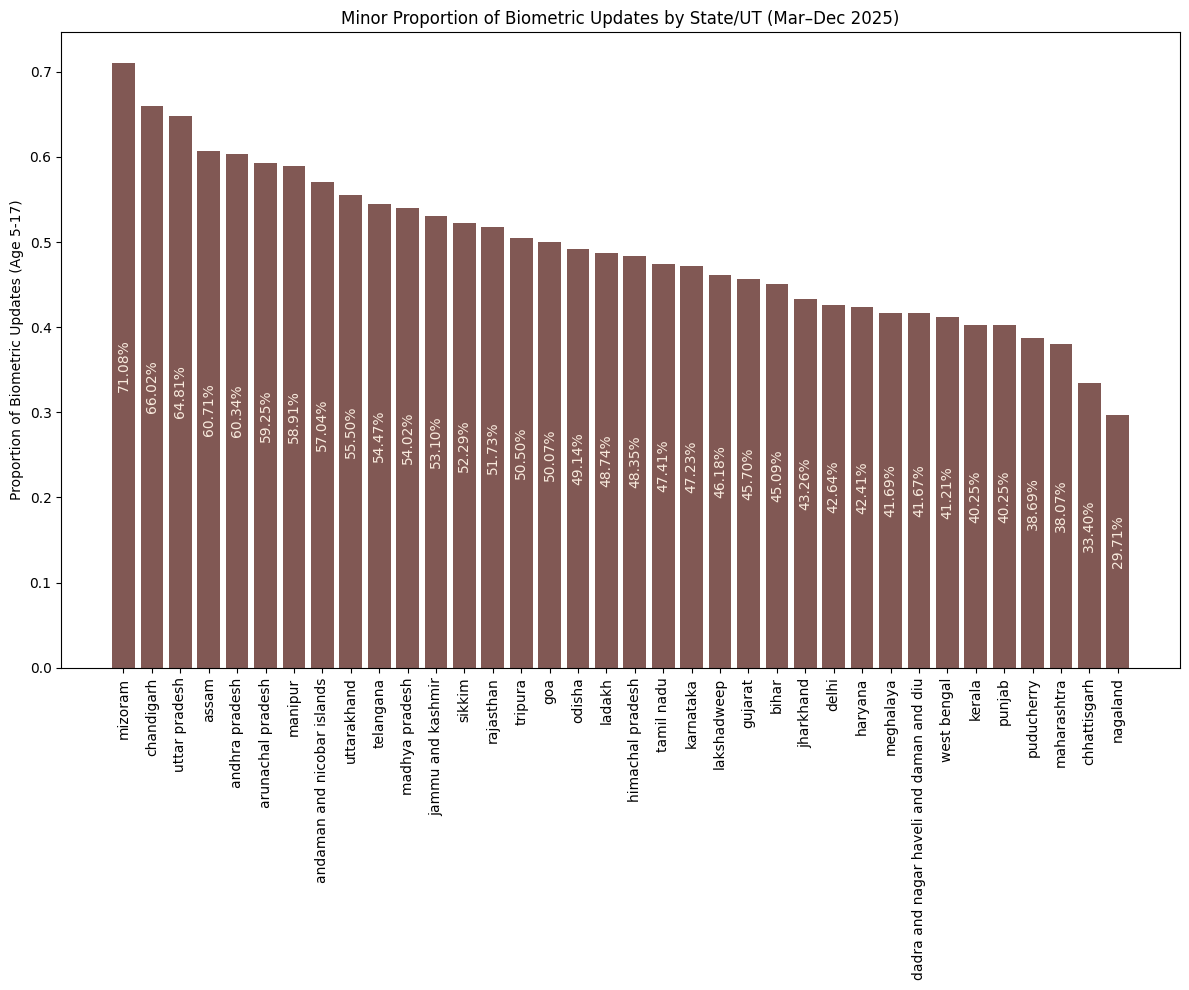

In [7]:
# MInor Proportion Bar Chart
plt.figure(figsize=(12, 10))
sorted_states2 = state_agg.sort_values('minor_ratio', ascending=False)

plt.bar(sorted_states2['state'], sorted_states2['minor_ratio'],color = '#815854')
for i, v in enumerate(sorted_states2['minor_ratio']):
    y = v / 2 if v > 0.08 else v + 0.01
    plt.text(i, y, f"{v:.2%}", ha='center', va='center', color='#F9EBDE' if v > 0.08 else 'black', rotation=90, fontsize=10)    

plt.xticks(rotation=90)
plt.ylabel('Proportion of Biometric Updates (Age 5-17)')
plt.title('Minor Proportion of Biometric Updates by State/UT (Mar–Dec 2025)')
plt.tight_layout()
plt.show()

In [8]:
state_date_counts = df.groupby('state')['date'].nunique()

state_date_counts.describe()

count    36.000000
mean     87.638889
std       1.606287
min      82.000000
25%      87.000000
50%      88.000000
75%      89.000000
max      89.000000
Name: date, dtype: float64

In [9]:
state_date_counts.sort_values()

state
andaman and nicobar islands                 82
sikkim                                      84
lakshadweep                                 84
chandigarh                                  86
ladakh                                      86
dadra and nagar haveli and daman and diu    87
goa                                         87
nagaland                                    87
mizoram                                     87
meghalaya                                   87
manipur                                     87
arunachal pradesh                           87
assam                                       88
telangana                                   88
andhra pradesh                              88
punjab                                      88
puducherry                                  88
odisha                                      88
west bengal                                 88
kerala                                      88
jammu and kashmir                           88
himacha

In [10]:
date_state_counts = df.groupby('date')['state'].nunique()

date_state_counts.describe()

count    89.000000
mean     35.449438
std       2.888107
min      12.000000
25%      36.000000
50%      36.000000
75%      36.000000
max      36.000000
Name: state, dtype: float64

In [11]:
date_state_counts.sort_values()

date
2025-12-22    12
2025-12-23    24
2025-10-13    31
2025-10-22    33
2025-09-14    34
              ..
2025-10-17    36
2025-10-16    36
2025-10-15    36
2025-09-19    36
2025-12-29    36
Name: state, Length: 89, dtype: int64

## Data Visualisation & Trends

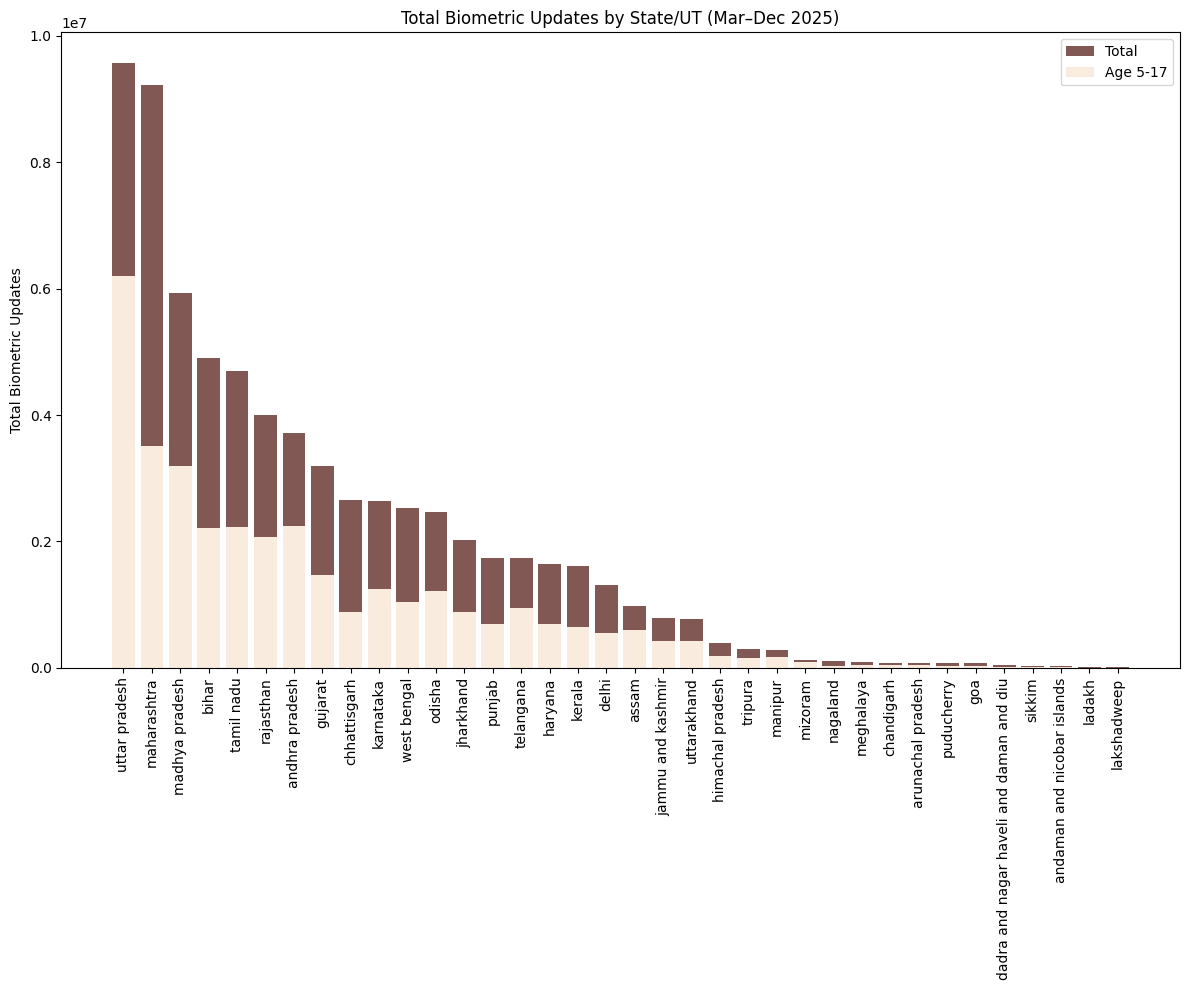

In [12]:
# Visualization
plt.figure(figsize=(12, 10))
sorted_states = state_agg.sort_values('bio_total', ascending=False)

plt.bar(sorted_states['state'], sorted_states['bio_total'],color ='#815854', label='Total')
plt.bar(sorted_states['state'], sorted_states['bio_age_5_17'], color='#F9EBDE', label='Age 5-17')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Total Biometric Updates')
plt.title('Total Biometric Updates by State/UT (Mar–Dec 2025)')
plt.tight_layout()
plt.show()

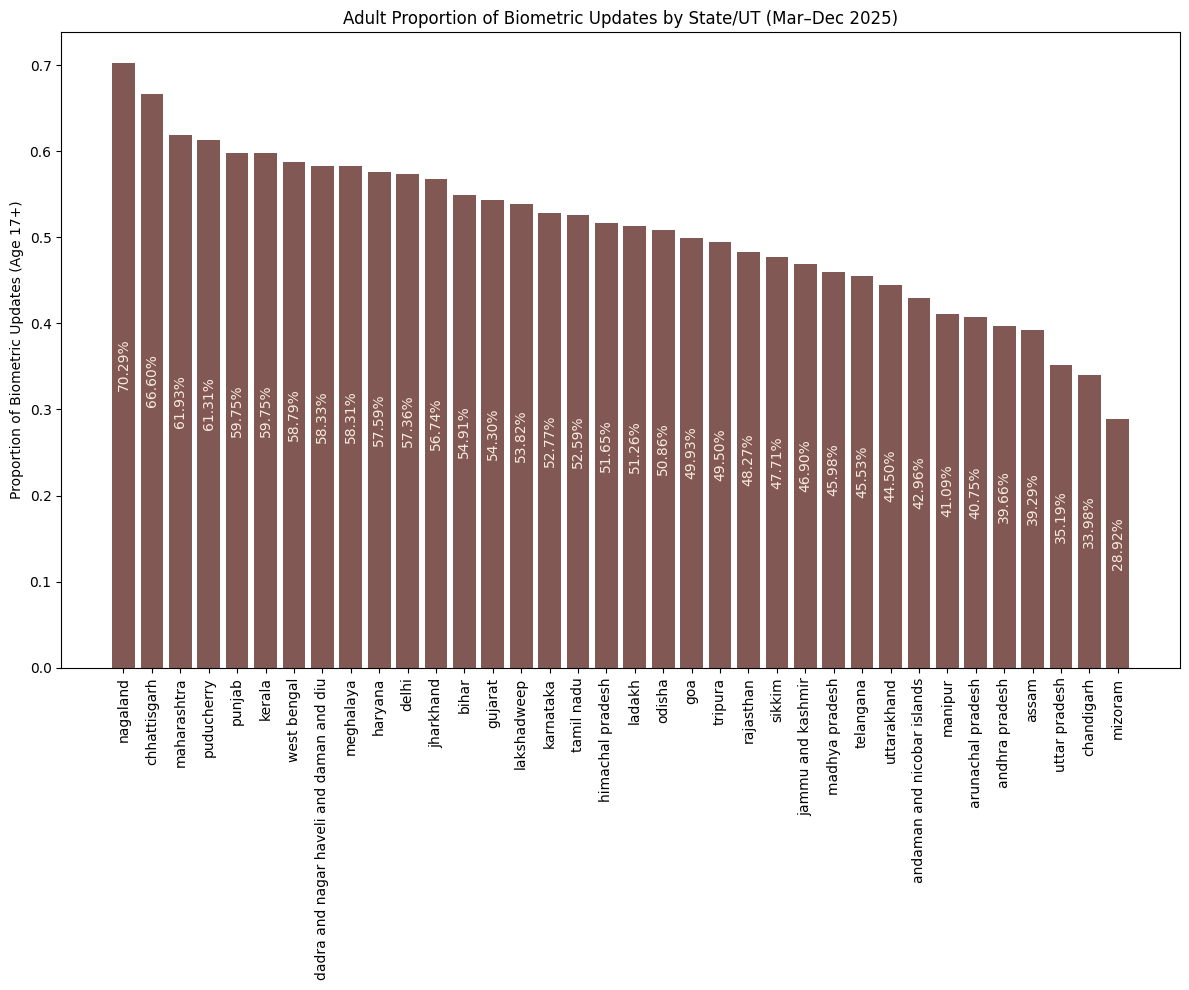

In [13]:
# Visualization
state_agg['adult_ratio'] = state_agg['bio_age_17_'] / state_agg['bio_total']

plt.figure(figsize=(12, 10))
sorted_states2 = state_agg.sort_values('adult_ratio', ascending=False)

plt.bar(sorted_states2['state'], sorted_states2['adult_ratio'],color = '#815854')
for i, v in enumerate(sorted_states2['adult_ratio']):
    y = v / 2 if v > 0.08 else v + 0.01
    plt.text(i, y, f"{v:.2%}", ha='center', va='center', color='#F9EBDE' if v > 0.08 else 'black', rotation=90, fontsize=10)    

plt.xticks(rotation=90)
plt.ylabel('Proportion of Biometric Updates (Age 17+)')
plt.title('Adult Proportion of Biometric Updates by State/UT (Mar–Dec 2025)')
plt.tight_layout()
plt.show()

In [14]:
# PIN-wise Focus on Maharashtra
mh = df[df['state'] == 'maharashtra'].copy()
pin_adult_mh = (
    mh.groupby('pincode')['bio_age_17_']
      .sum()
      .reset_index()
      .sort_values('bio_age_17_', ascending=False)
)

print(pin_adult_mh.head(10))
print('Shape: ' + str(pin_adult_mh.shape))

      pincode  bio_age_17_
1155   431001        54661
925    421302        32031
1019   423203        29968
40     400043        25004
1184   431122        23629
924    421301        22399
104    400612        22223
1208   431203        21773
457    413512        20203
1484   444001        20201
Shape: (1607, 2)


In [15]:
# Compute cumulative contribution
pin_adult_mh['cum_adult'] = pin_adult_mh['bio_age_17_'].cumsum()
total_adult = pin_adult_mh['bio_age_17_'].sum()

pin_adult_mh['cum_share'] = pin_adult_mh['cum_adult'] / total_adult
pins_50 = pin_adult_mh[pin_adult_mh['cum_share'] <= 0.50].shape[0]
pins_80 = pin_adult_mh[pin_adult_mh['cum_share'] <= 0.80].shape[0]

pins_50, pins_80

(267, 668)

In [16]:
# Maharashtra subset
mh = df[df['state'] == 'maharashtra'].copy()

# Rank PINs by adult updates within each date
mh['rank_pct'] = mh.groupby('date')['bio_age_17_'] \
                    .rank(method='first', ascending=False, pct=True)
mh['high_stress'] = mh['rank_pct'] <= 0.10

# Count persistence
pin_persistence = (
    mh[mh['high_stress']]
    .groupby('pincode')['date']
    .nunique()
    .reset_index(name='high_stress_days')
    .sort_values('high_stress_days', ascending=False)
)

pin_persistence.head(10), pin_persistence['high_stress_days'].describe()

(     pincode  high_stress_days
 346   431001                84
 279   423203                82
 329   425412                80
 6     400043                79
 610   445204                78
 378   431203                78
 232   421301                78
 422   431715                78
 397   431513                78
 140   413512                78,
 count    625.000000
 mean      22.828800
 std       25.016875
 min        1.000000
 25%        2.000000
 50%       10.000000
 75%       41.000000
 max       84.000000
 Name: high_stress_days, dtype: float64)

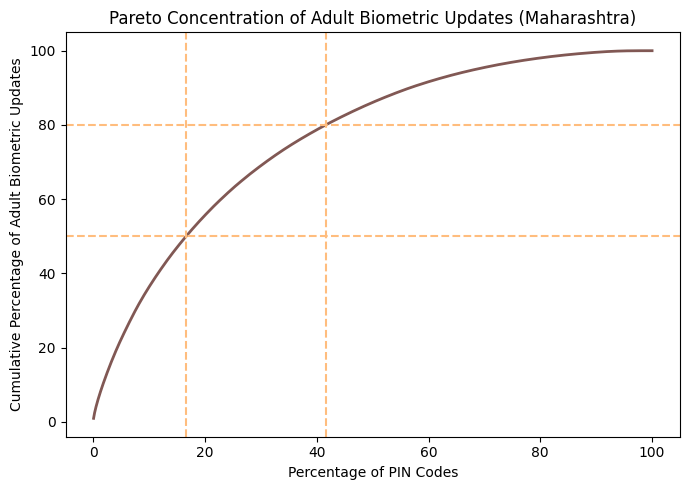

In [17]:
# Percentage of PINs
x = np.arange(1, len(pin_adult_mh) + 1) / len(pin_adult_mh) * 100
y = pin_adult_mh['cum_share'] * 100

plt.figure(figsize=(7, 5))
plt.plot(x, y, linewidth=2, color='#815854')

# Reference lines
plt.axhline(50, linestyle='--', color = "#FFBD7E")
plt.axhline(80, linestyle='--', color = '#FFBD7E')
plt.axvline(267 / 1607 * 100, linestyle='--', color = '#FFBD7E')
plt.axvline(668 / 1607 * 100, linestyle='--', color = '#FFBD7E')

plt.xlabel('Percentage of PIN Codes')
plt.ylabel('Cumulative Percentage of Adult Biometric Updates')
plt.title('Pareto Concentration of Adult Biometric Updates (Maharashtra)')
plt.tight_layout()
plt.show()

In [18]:
# PIN-wise Focus on Chhattisgarh
cg = df[df['state'] == 'chhattisgarh'].copy()
pin_adult_cg = (
    cg.groupby('pincode')['bio_age_17_']
      .sum()
      .reset_index()
      .sort_values('bio_age_17_', ascending=False)
)

pin_adult_cg.head(10), pin_adult_cg.shape

(     pincode  bio_age_17_
 47    491995        27779
 26    491335        25187
 238   497001        24042
 209   496001        21560
 169   495334        21189
 13    491001        20996
 48    492001        20941
 86    493445        20155
 98    493773        19828
 92    493558        18739,
 (269, 2))

In [19]:
# Cumulative contribution
pin_adult_cg['cum_adult'] = pin_adult_cg['bio_age_17_'].cumsum()
total_adult_cg = pin_adult_cg['bio_age_17_'].sum()

pin_adult_cg['cum_share'] = pin_adult_cg['cum_adult'] / total_adult_cg

# Pareto cutoffs
pins_50_cg = pin_adult_cg[pin_adult_cg['cum_share'] <= 0.50].shape[0]
pins_80_cg = pin_adult_cg[pin_adult_cg['cum_share'] <= 0.80].shape[0]

pins_50_cg, pins_80_cg

(64, 139)

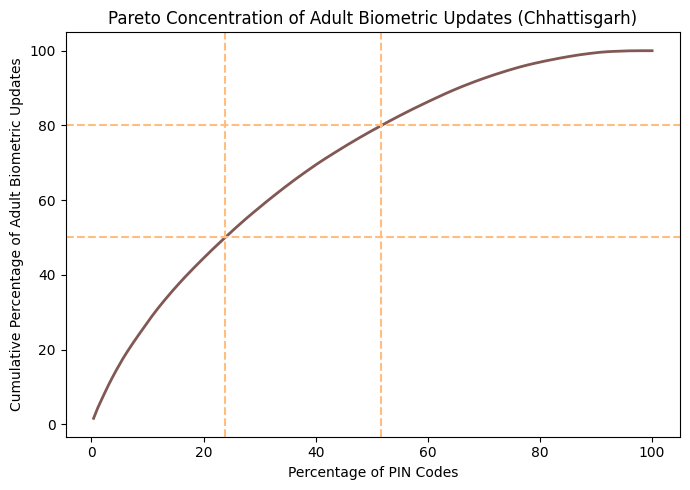

In [20]:
x = np.arange(1, len(pin_adult_cg) + 1) / len(pin_adult_cg) * 100
y = pin_adult_cg['cum_share'] * 100

plt.figure(figsize=(7, 5))
plt.plot(x, y, linewidth=2, color='#815854')

# Reference lines
plt.axhline(50, linestyle='--', color = '#FFBD7E')
plt.axhline(80, linestyle='--', color = '#FFBD7E')
plt.axvline(pins_50_cg / len(pin_adult_cg) * 100, linestyle='--', color = '#FFBD7E')
plt.axvline(pins_80_cg / len(pin_adult_cg) * 100, linestyle='--', color = '#FFBD7E')

plt.xlabel('Percentage of PIN Codes')
plt.ylabel('Cumulative Percentage of Adult Biometric Updates')
plt.title('Pareto Concentration of Adult Biometric Updates (Chhattisgarh)')
plt.tight_layout()
plt.show()

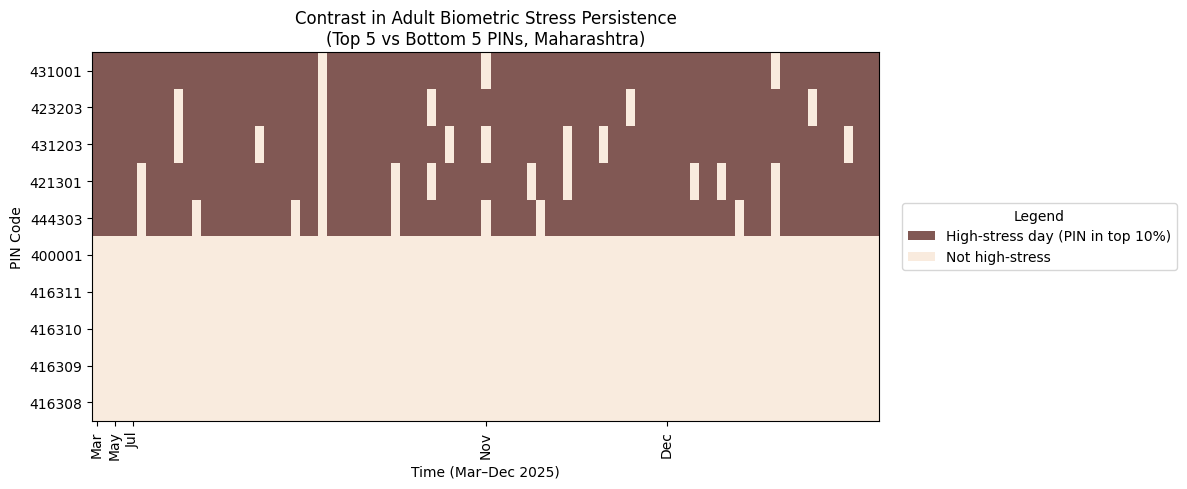

In [21]:
# Maharashtra subset
mh_df = df[df['state'] == 'maharashtra'].copy()

# Aggregate adult updates PIN-wise per day
daily_pin_load = (
    mh_df
    .groupby(['date', 'pincode'])['bio_age_17_']
    .sum()
    .reset_index()
)

# High-stress flag (top 10% per day)
daily_pin_load['high_stress'] = (
    daily_pin_load
    .groupby('date')['bio_age_17_']
    .transform(lambda x: x >= x.quantile(0.9))
    .astype(int)
)

# PIN-level persistence (number of high-stress days)
pin_persistence_mh = (
    daily_pin_load
    .groupby('pincode')['high_stress']
    .sum()
    .reset_index(name='high_stress_days')
)

# Select top 5 and bottom 5 PINs by persistence
top_5 = (
    pin_persistence_mh
    .sort_values('high_stress_days', ascending=False)
    .head(5)['pincode']
    .tolist()
)

bottom_5 = (
    pin_persistence_mh
    .sort_values('high_stress_days', ascending=True)
    .head(5)['pincode']
    .tolist()
)

selected_pins = top_5 + bottom_5

# Filter to selected PINs only
daily_pin_load = daily_pin_load[
    daily_pin_load['pincode'].isin(selected_pins)
]

# PIN × Date stress matrix
stress_matrix = (
    daily_pin_load
    .pivot_table(
        index='pincode',
        columns='date',
        values='high_stress',
        aggfunc='max',
        fill_value=0
    )
    .reindex(selected_pins)
    .fillna(0)
)

# X-axis month markers (every 2 months, ensure Oct–Dec)
dates = stress_matrix.columns

month_positions = [
    (i, d.strftime("%b"))
    for i, d in enumerate(dates)
    if d.day == 1
]

selected = month_positions[::2]

for i, label in month_positions:
    if label in ["Oct", "Nov", "Dec"] and (i, label) not in selected:
        selected.append((i, label))

selected = sorted(selected, key=lambda x: x[0])

filtered_ticks = [i for i, _ in selected]
filtered_labels = [label for _, label in selected]

# Visualization
fig, ax = plt.subplots(figsize=(12, 5))

ax.imshow(
    stress_matrix.values.astype(float),
    aspect='auto',
    cmap=ListedColormap(["#F9EBDE", "#815854"])
)

ax.set_yticks(range(len(stress_matrix.index)))
ax.set_yticklabels(stress_matrix.index.astype(str))

ax.set_xticks(filtered_ticks)
ax.set_xticklabels(filtered_labels, rotation=90)

ax.set_xlabel("Time (Mar–Dec 2025)")
ax.set_ylabel("PIN Code")
ax.set_title(
    "Contrast in Adult Biometric Stress Persistence\n"
    "(Top 5 vs Bottom 5 PINs, Maharashtra)"
)

legend_elements = [
    mpatches.Patch(facecolor="#815854", label="High-stress day (PIN in top 10%)"),
    mpatches.Patch(facecolor="#F9EBDE", label="Not high-stress")
]

ax.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    title="Legend"
)

plt.tight_layout()
plt.show()

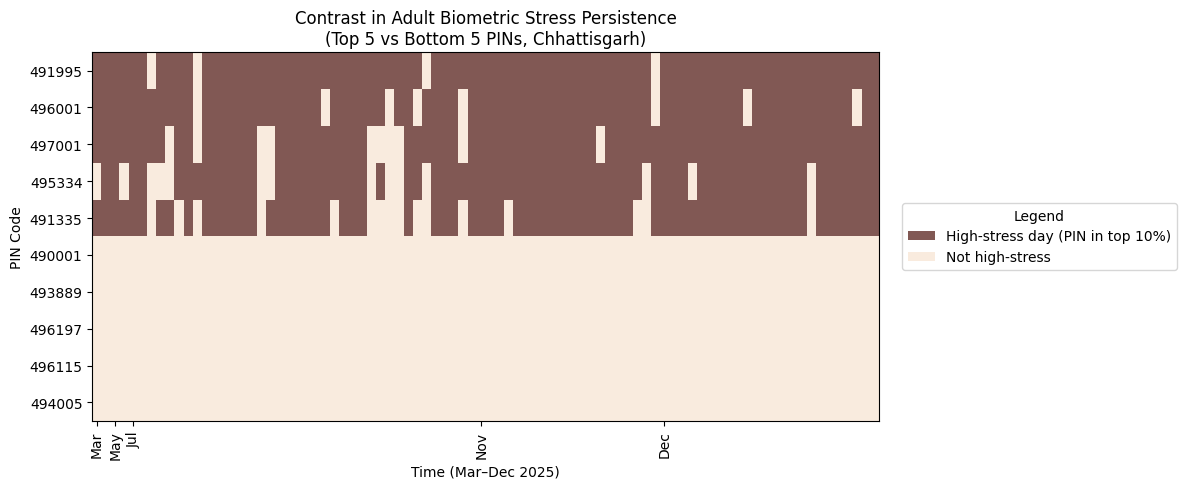

In [22]:
# Chhatisgarh subset
cg_df = df[df['state'] == 'chhattisgarh'].copy()
daily_pin_load = (
    cg_df
    .groupby(['date', 'pincode'])['bio_age_17_']
    .sum()
    .reset_index()
)

# High stress flag (top 10% per day)
daily_pin_load['high_stress'] = (
    daily_pin_load
    .groupby('date')['bio_age_17_']
    .transform(lambda x: x >= x.quantile(0.9))
    .astype(int)
)
pin_persistence_cg = (
    daily_pin_load
    .groupby('pincode')['high_stress']
    .sum()
    .reset_index(name='high_stress_days')
)

# Select top 5 and bottom 5 PINs by high-stress day persistence
top_5 = (
    pin_persistence_cg
    .sort_values('high_stress_days', ascending=False)
    .head(5)['pincode']
    .tolist()
)
bottom_5 = (
    pin_persistence_cg
    .sort_values('high_stress_days', ascending=True)
    .head(5)['pincode']
    .tolist()
)
selected_pins = top_5 + bottom_5
daily_pin_load = daily_pin_load[
    daily_pin_load['pincode'].isin(selected_pins)
]

# Matrix Construction
stress_matrix = (
    daily_pin_load
    .pivot_table(
        index='pincode',
        columns='date',
        values='high_stress',
        aggfunc='max',
        fill_value=0
    )
    .reindex(selected_pins)
    .fillna(0)
)

# Visualization
dates = stress_matrix.columns

month_positions = [
    (i, d.strftime("%b"))
    for i, d in enumerate(dates)
    if d.day == 1
]

selected = month_positions[::2]

for i, label in month_positions:
    if label in ["Oct", "Nov", "Dec"] and (i, label) not in selected:
        selected.append((i, label))

selected = sorted(selected, key=lambda x: x[0])

filtered_ticks = [i for i, _ in selected]
filtered_labels = [label for _, label in selected]
fig, ax = plt.subplots(figsize=(12, 5))

ax.imshow(
    stress_matrix.values.astype(float),
    aspect='auto',
    cmap=ListedColormap(["#F9EBDE", "#815854"])
)

ax.set_yticks(range(len(stress_matrix.index)))
ax.set_yticklabels(stress_matrix.index.astype(str))

ax.set_xticks(filtered_ticks)
ax.set_xticklabels(filtered_labels, rotation=90)

ax.set_xlabel("Time (Mar–Dec 2025)")
ax.set_ylabel("PIN Code")
ax.set_title(
    "Contrast in Adult Biometric Stress Persistence\n"
    "(Top 5 vs Bottom 5 PINs, Chhattisgarh)"
)

legend_elements = [
    mpatches.Patch(facecolor="#815854", label="High-stress day (PIN in top 10%)"),
    mpatches.Patch(facecolor="#F9EBDE", label="Not high-stress")
]

ax.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    title="Legend"
)

plt.tight_layout()
plt.show()